In [3]:
import matplotlib.pyplot as plt
import geopandas
import os
import numpy as np
import math
import collections
import sys    

Checkout the frequency of the states left to label

In [4]:
tile_url = np.load('tile_name_tile_url_remaining_expanded.npy')[:,1]
states = []
for tile in tile_url:
    states.append(tile.split("/")[5])
for key, value in collections.Counter(states).items():
   print(f"{key}: {value}")

ca: 13
mi: 13
wi: 7
tx: 57
ms: 7
nc: 8
va: 5
ct: 1
ma: 5
me: 1
nd: 11
mo: 9
ky: 3
wv: 11
ne: 7
ut: 3
md: 1
de: 1
nm: 8
tn: 3
vt: 1
sd: 3
in: 3


In [15]:
states_gpds = geopandas.read_file("C:/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")


In [16]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", 
               "Colorado", "Connecticut", "Delaware", "Florida", 
               "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", 
               "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan",
               "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", 
               "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", 
               "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
               "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", 
               "Washington", "Wisconsin", "West Virginia", "Wyoming"]

state_names_cont_48 = ["Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Maryland", "Maine",
               "Georgia", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts","Washington",
               "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota",  "Wisconsin", "West Virginia", "Wyoming",
               "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Virginia", "Vermont",  "Michigan",
               "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "Tennessee", "Texas", "Utah", "South Dakota"]
states_cont_48_gds = states_gpds[states_gpds['NAME'].isin(state_names_cont_48)]

In [21]:
os.getcwd()

'C:\\Users\\rapiduser\\cred\\AST_dataset\\data_download_and_preprocessing'

https://jcutrer.com/python/learn-geopandas-plotting-usmaps
https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
https://geopandas.org/getting_started/introduction.html
https://github.com/geopandas/geopandas/issues/660
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d

In [25]:
#Load other data
#expanded_only_additional = np.load("/home/jovyan/work/AST/data_download_and_preprocessing/image_download_azure/tile_name_tile_url_expanded_only.npy")
remaining = np.load("tile_name_tile_url_remaining_expanded.npy")

#load numpy
labeled = np.load("tile_name_tile_url_labeled.npy")
#get list of states that have already been labeled
labeled_states = []
for tile in labeled[:,1]:
    labeled_states.append(tile.split("/")[5])
states_labeled_freq = np.array(labeled_states)  
labeled_states = np.unique(np.array(labeled_states))
#reformat
for tile in range(len(labeled_states)):
    labeled_states[tile] = labeled_states[tile].upper()
#get geopandas dataframe
labeled_states_gpds = states_gpds[states_gpds['STUSPS'].isin(labeled_states)]

tile_count = collections.Counter(states_labeled_freq)
# printing the element and the frequency
#for key, value in elements_count.items():
#   print(f"{key.upper()}: {value}")
#print(len(elements_count))
# Provide 'Address' as the column name
#labeled_states_gpds['IMAGE_COUNT'] = new_dict

#load numpy
expanded_full = np.load("image_download_azure/tile_name_tile_url_eia_hfid_thirty_ports_expanded.npy")
#get list of states that have already been labeled
expanded_set_states = []
for tile in expanded_full[:,1]:
    expanded_set_states.append(tile.split("/")[5])
expanded_set_states = np.unique(np.array(expanded_set_states))
#reformat
for i in range(len(expanded_set_states)):
    expanded_set_states[i] = expanded_set_states[i].upper()
#get geopandas dataframe
expanded_set_states_gpds = states_gpds[states_gpds['STUSPS'].isin(expanded_set_states)]

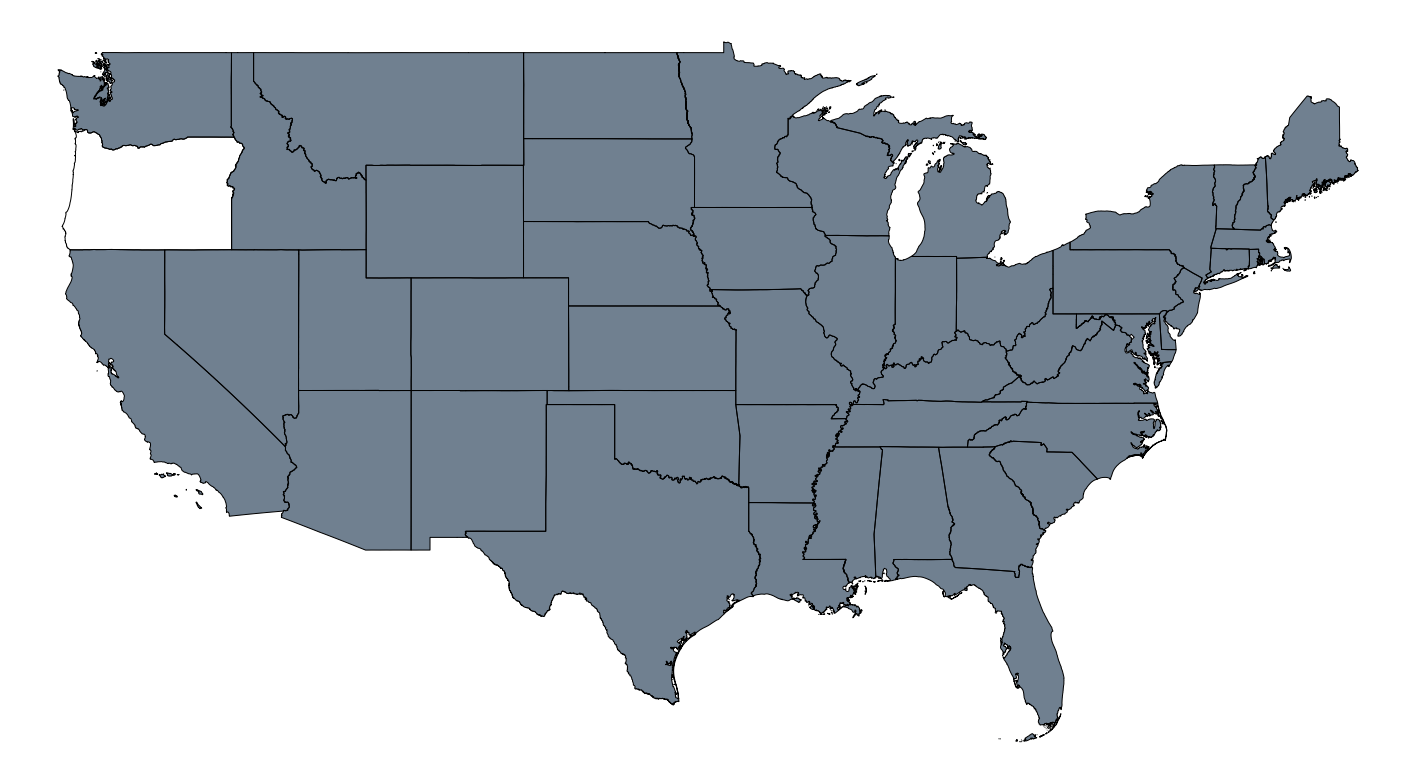

In [26]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
plt.xlim([-127, -65])
#plt.tick_params(left=False)
ax.axis("off")

states_cont_48_gds.boundary.plot(ax=ax, color="Black", linewidth=1.0)
labeled_states_gpds.plot(ax=ax, color="slategrey", label='Labeled States')
#labeled_states_gpds.apply(lambda x: ax.annotate(s=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1)
plt.savefig('map_of_coverage_labeled_states')

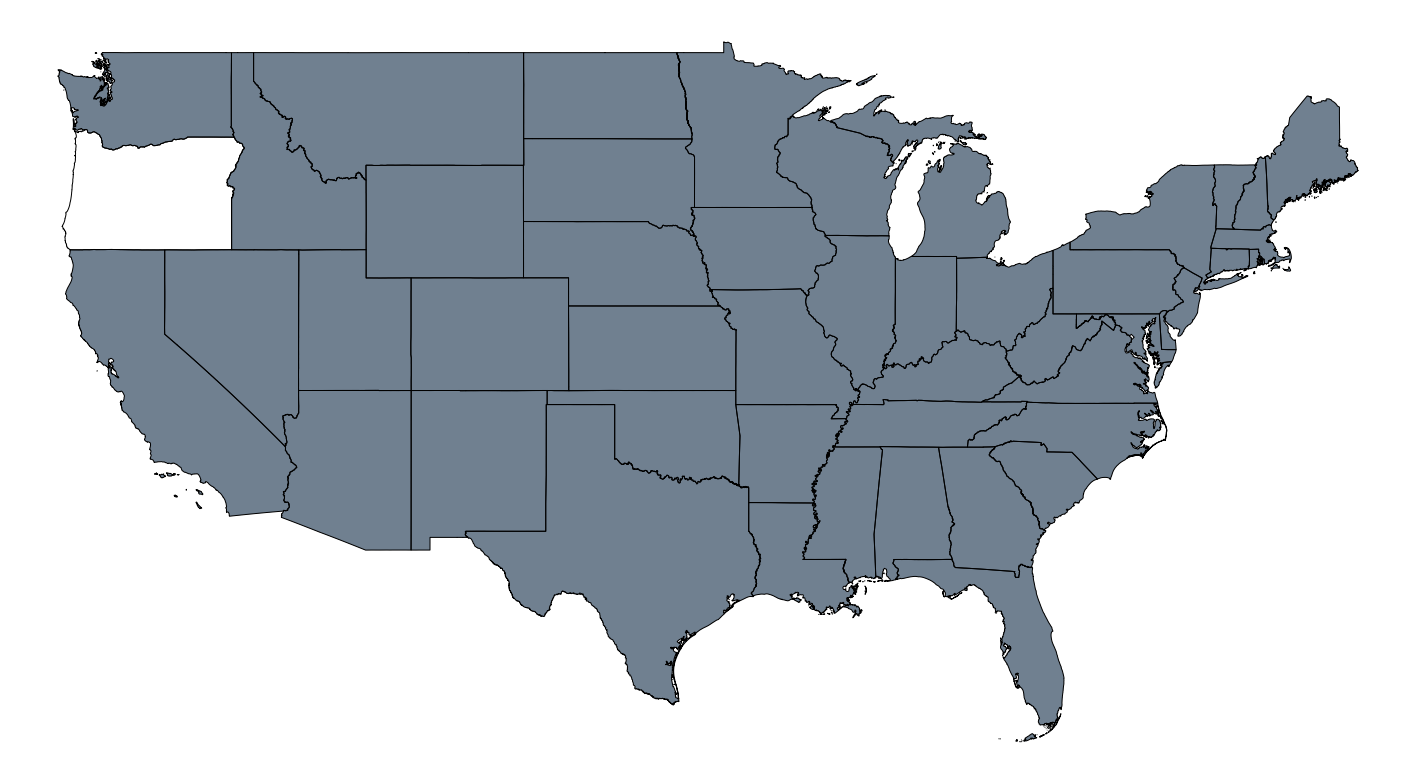

In [27]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
plt.xlim([-127, -65])
#plt.tick_params(left=False)
ax.axis("off")

states_cont_48_gds.boundary.plot(ax=ax, color="Black", linewidth=1.0)
expanded_set_states_gpds.plot(ax=ax, color="silver", label='Administrative divisions')
labeled_states_gpds.plot(ax=ax, color="slategrey", label='Labeled States')
#labeled_states_gpds.apply(lambda x: ax.annotate(s=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1)
plt.savefig('map_of_coverage_labeled_states_extended')